# Plot Donuts With Latest Datasets

In [5]:
import climlab
import numpy as np
import phys
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import pandas as pd
import DonutFunctions as df
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import Calculated Heights file from Cluster

In [38]:
heights

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    height   (lat, lon) float64 ...

In [6]:
heights = xr.open_dataset('Data/Cluster/heights_measured.nc')

heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.csulf.values,temp.lon,temp.lat)

olrs_ltmm = xr.open_dataset(path + 'Cluster/olrs_ltmm.nc')

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

In [26]:
def plot(i_raw, j_raw):
    i = np.where(lats == i_raw)[0][0]
    j = np.where(lons == j_raw)[0][0]

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,5))

    month_list = np.arange(1,13)
    lc1 = '#7d7d7d'

    cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis')
    axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=lc1, label='Calculated OLR')
    axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c=lc1)
    
    #df.height()
    
    nam = str('Lat: %s, Lon: %s' % (i_raw, j_raw))
    axs.set_title(nam)
    
    axs.set_xlabel("Near-surface Temperature (K)")
    axs.set_ylabel("OLR (W/m$^2$)")
    
    cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1)
    cbar.ax.set_title(r'Month',fontsize=16,y=1.04,x=2.5)
    
    plt.savefig('./Figures/%s %s.png' % (i_raw, j_raw), bbox_inches='tight')

def get_height(lat_val, lon_val):
    return heights.sel(lat=lat_val, lon=lon_val).height.values[()]

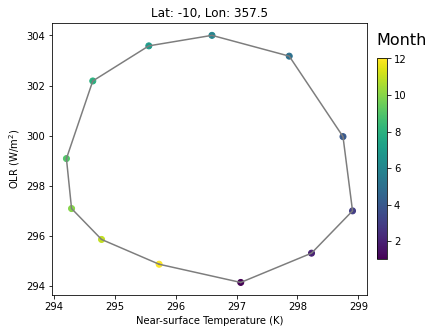

In [42]:
plot(-10,357.5)

In [8]:
get_height(-10, 357.5)

7.4308641846318455

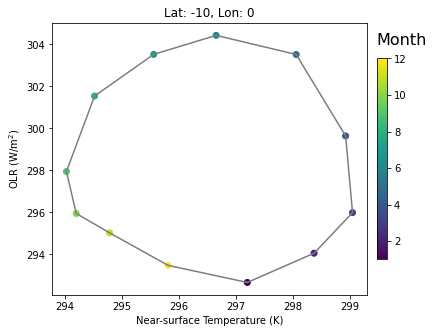

In [5]:
plot(-10,0)

In [15]:
get_height(-10, 0)

8.644997829197164

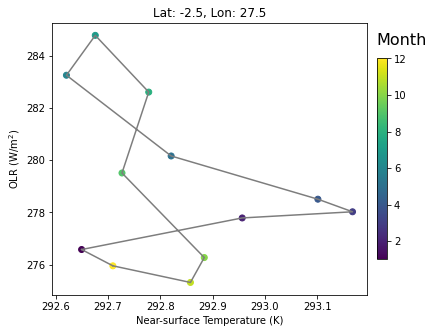

In [6]:
plot(-2.5, 27.5)

In [17]:
get_height(-2.5, 27.5)

2.15576404031028

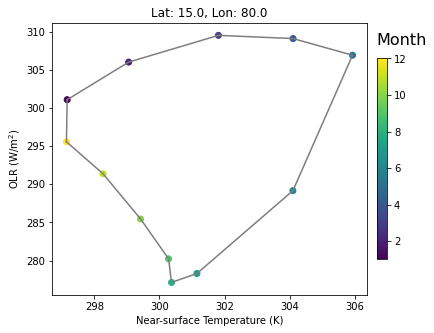

In [7]:
plot(15.0, 80.0)

In [19]:
get_height(15.0, 80.0)

19.375092227661675

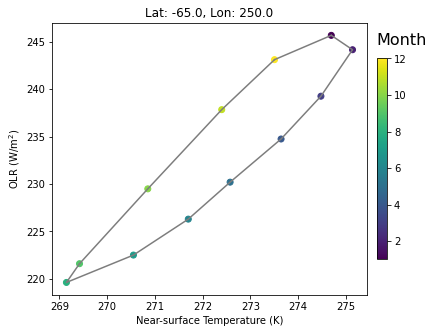

In [8]:
plot(-65.0, 250.0)

In [20]:
get_height(-65.0, 250.0)

6.066065093276183

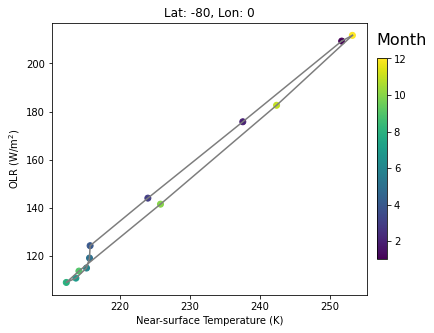

In [27]:
plot(-80, 0)

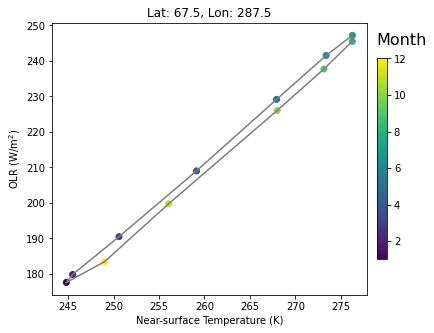

In [28]:
plot(67.5, 287.5)

# Koll and Cronin reproduction

In [36]:
def plot_knc():
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,9))
    
    month_list = np.arange(1,13)
    lc1 = '#7d7d7d'
    
    for i_raw in lats:
        for j_raw in lons:
            i = np.where(lats == i_raw)[0][0]
            j = np.where(lons == j_raw)[0][0]
            
            if i_raw > -88: # Messy results near antarctica
                cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=1)
            
            #axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=lc1, label='Calculated OLR')
            #axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c=lc1)
        df.update_progress(0)
        print(i_raw)
    
    axs.set_xlabel("Near-surface Temperature (K)")
    axs.set_ylabel("OLR (W/m$^2$)")
    
    #cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1)
    #cbar.ax.set_title(r'Month',fontsize=16,y=1.04,x=2.5)
    
    cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1, label='Month')

    
    plt.savefig('./Figures/kandc full s1 big.png', bbox_inches='tight')

Progress: [--------------------] 0.0%
-90.0


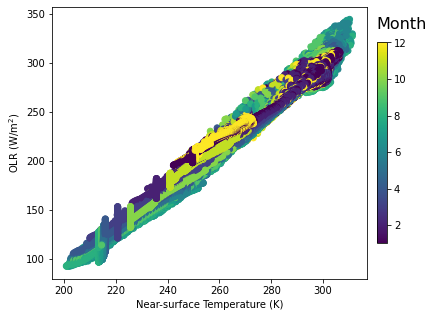

In [50]:
plot_knc() # Original

Progress: [--------------------] 0.0%
-90.0


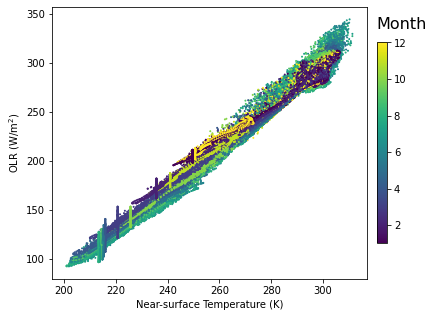

In [52]:
plot_knc() # s=1

Progress: [--------------------] 0.0%
-90.0


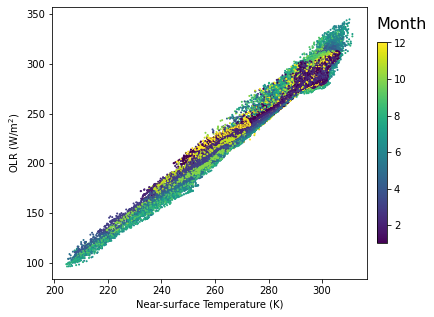

In [54]:
plot_knc() # removing everything beyond 80 S

Progress: [--------------------] 0.0%
-90.0


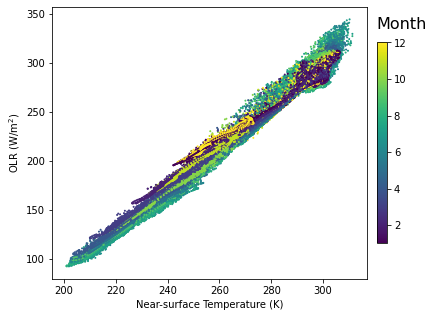

In [56]:
plot_knc() # removing everything beyond 80 S

Progress: [--------------------] 0.0%
-90.0


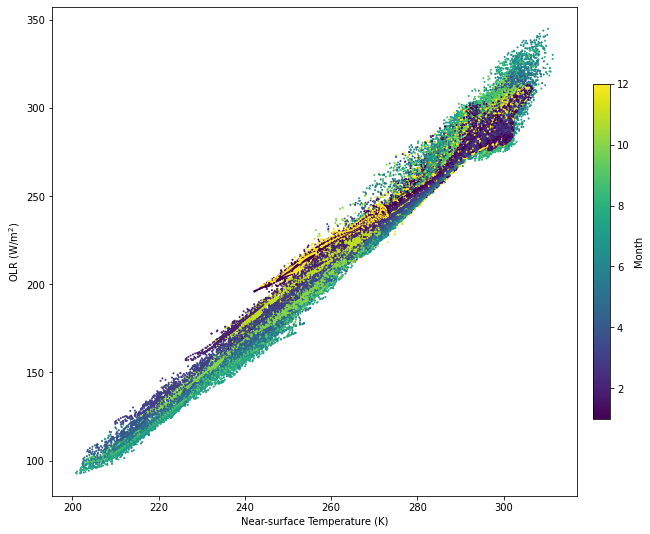

In [37]:
plot_knc() # removing everything beyond 80 S

# Plotting one donut over Koll and Cronin

In [11]:
import matplotlib.ticker as mtick

In [15]:
def plot_knc_donut(latval, lonval):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    
    month_list = np.arange(1,13)
    lc1 = '#7d7d7d'
    
    for i in month_list:
        mon_time = ts_2m.time.values[i-1]
        axs[0].scatter(ts_2m.sel(time=mon_time, lat=lats[:72]).air.values.flatten(),olrs_ltmm.sel(month=i, lat=lats[:72]).olr.values.flatten(),c=lc1, s=1)

    i_raw = latval
    j_raw = lonval
    
    axs[0].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
    axs[0].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
    cplot = axs[0].scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)
    
    axs[0].set_xlabel("Near-surface Temperature (K)")
    axs[0].set_ylabel("OLR (W/m$^2$)")
    axs[0].set_title('Lat: %s, Lon: %s' % (latval, lonval))
    
    i_raw = latval
    j_raw = lonval

    axs[1].scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)
    axs[1].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=lc1, label='Calculated OLR')
    axs[1].plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c=lc1)
    
    axs[1].set_xlabel("Near-surface Temperature (K)")
    axs[1].set_ylabel("OLR (W/m$^2$)")
    axs[1].set_title('Lat: %s, Lon: %s' % (latval, lonval))
    axs[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
    
    cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1, label='Month')
    
    plt.savefig('./Figures/New K&C/kandc full s1 %s %s.png' % (latval, lonval), bbox_inches='tight')
    
    plt.close()

In [ ]:
plot_knc_donut(lats[np.random.randint(len(lats)-1)],lons[np.random.randint(len(lons))])

In [318]:
for i in range(100):
    plot_knc_donut(lats[np.random.randint(len(lats)-1)],lons[np.random.randint(len(lons))])

In [21]:
temp

<xarray.Dataset>
Dimensions:             (lat: 73, level: 17, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) float64 -6.571e+05 -6.57e+05 ... -6.567e+05
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    title:            

# Final K&C Figure with multiple plots over it

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,9))

month_list = np.arange(1,13)
lc1 = '#7d7d7d'

for i in month_list:
    mon_time = ts_2m.time.values[i-1]
    axs.scatter(ts_2m.sel(time=mon_time, lat=lats[:72]).air.values.flatten(),olrs_ltmm.sel(month=i, lat=lats[:72]).olr.values.flatten(),c=lc1, s=1)

latval = -2.5
lonval = 27.5
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -10
lonval = 0
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = 15
lonval = 80
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -65
lonval = 250
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -80
lonval = 0
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)

latval = -67.5
lonval = 287.5
    
i_raw = latval
j_raw = lonval

axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c='k', label='Calculated OLR')
axs.plot(ts_2m.sel(lat=i_raw, lon=j_raw).air.values[0::11],olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values[0::11],c='k')
cplot = axs.scatter(ts_2m.sel(lat=i_raw, lon=j_raw).air.values,olrs_ltmm.sel(lat=i_raw, lon=j_raw).olr.values,c=month_list,cmap='viridis', s=100)


axs.set_xlabel("Near-surface Temperature (K)")
axs.set_ylabel("OLR (W/m$^2$)")
#axs.set_title('Lat: %s, Lon: %s' % (latval, lonval))

cbar = fig.colorbar(cplot, fraction=0.03,pad=0.03,shrink=1, label='Month')

plt.savefig('./Figures/KC Combo.png', bbox_inches='tight')

plt.close()